In [1]:
import sys
import os
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.append(project_root)
from config import *

In [46]:
import pandas as pd
import numpy as np
data = pd.read_csv(os.path.join(DATA_RAW_DIR, 'CreditRisk.csv'))
data['target'] = np.where(data['status'] == 'ok', 0, 1)

In [47]:
data.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price,target
0,ok,9,rent,60,30,married,no,freelance,73,129,0,0,800,846,0
1,ok,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658,0
2,default,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985,1
3,ok,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325,0
4,ok,0,rent,36,26,single,no,fixed,46,107,0,0,310,910,0


In [48]:
data.status.value_counts(normalize=True)

status
ok         0.718294
default    0.281481
unk        0.000224
Name: proportion, dtype: float64

In [49]:
pd.pivot_table(
    data,
    index = 'job' ,
    columns= 'status',
    values= 'seniority',
    aggfunc = 'count',
    margins=True
)

status,default,ok,unk,All
job,,,,
fixed,580.0,2225.0,1.0,2806
freelance,333.0,691.0,NaN,1024
others,68.0,103.0,NaN,171
partime,271.0,181.0,NaN,452
unk,2.0,NaN,NaN,2
All,1254.0,3200.0,1.0,4455


c:\Users\Carlos\Documents\FUTURA\credit_scoring\src\analysis.py:1124: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = data_no_null, y = i, x = target,
c:\Users\Carlos\Documents\FUTURA\credit_scoring\src\analysis.py:1124: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = data_no_null, y = i, x = target,
c:\Users\Carlos\Documents\FUTURA\credit_scoring\src\analysis.py:1124: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = data_no_null, y = i, x = target,
c:\Users\Carlos\Documents\FUTURA\credit_scoring\src\analysis.py:1124: FutureWar

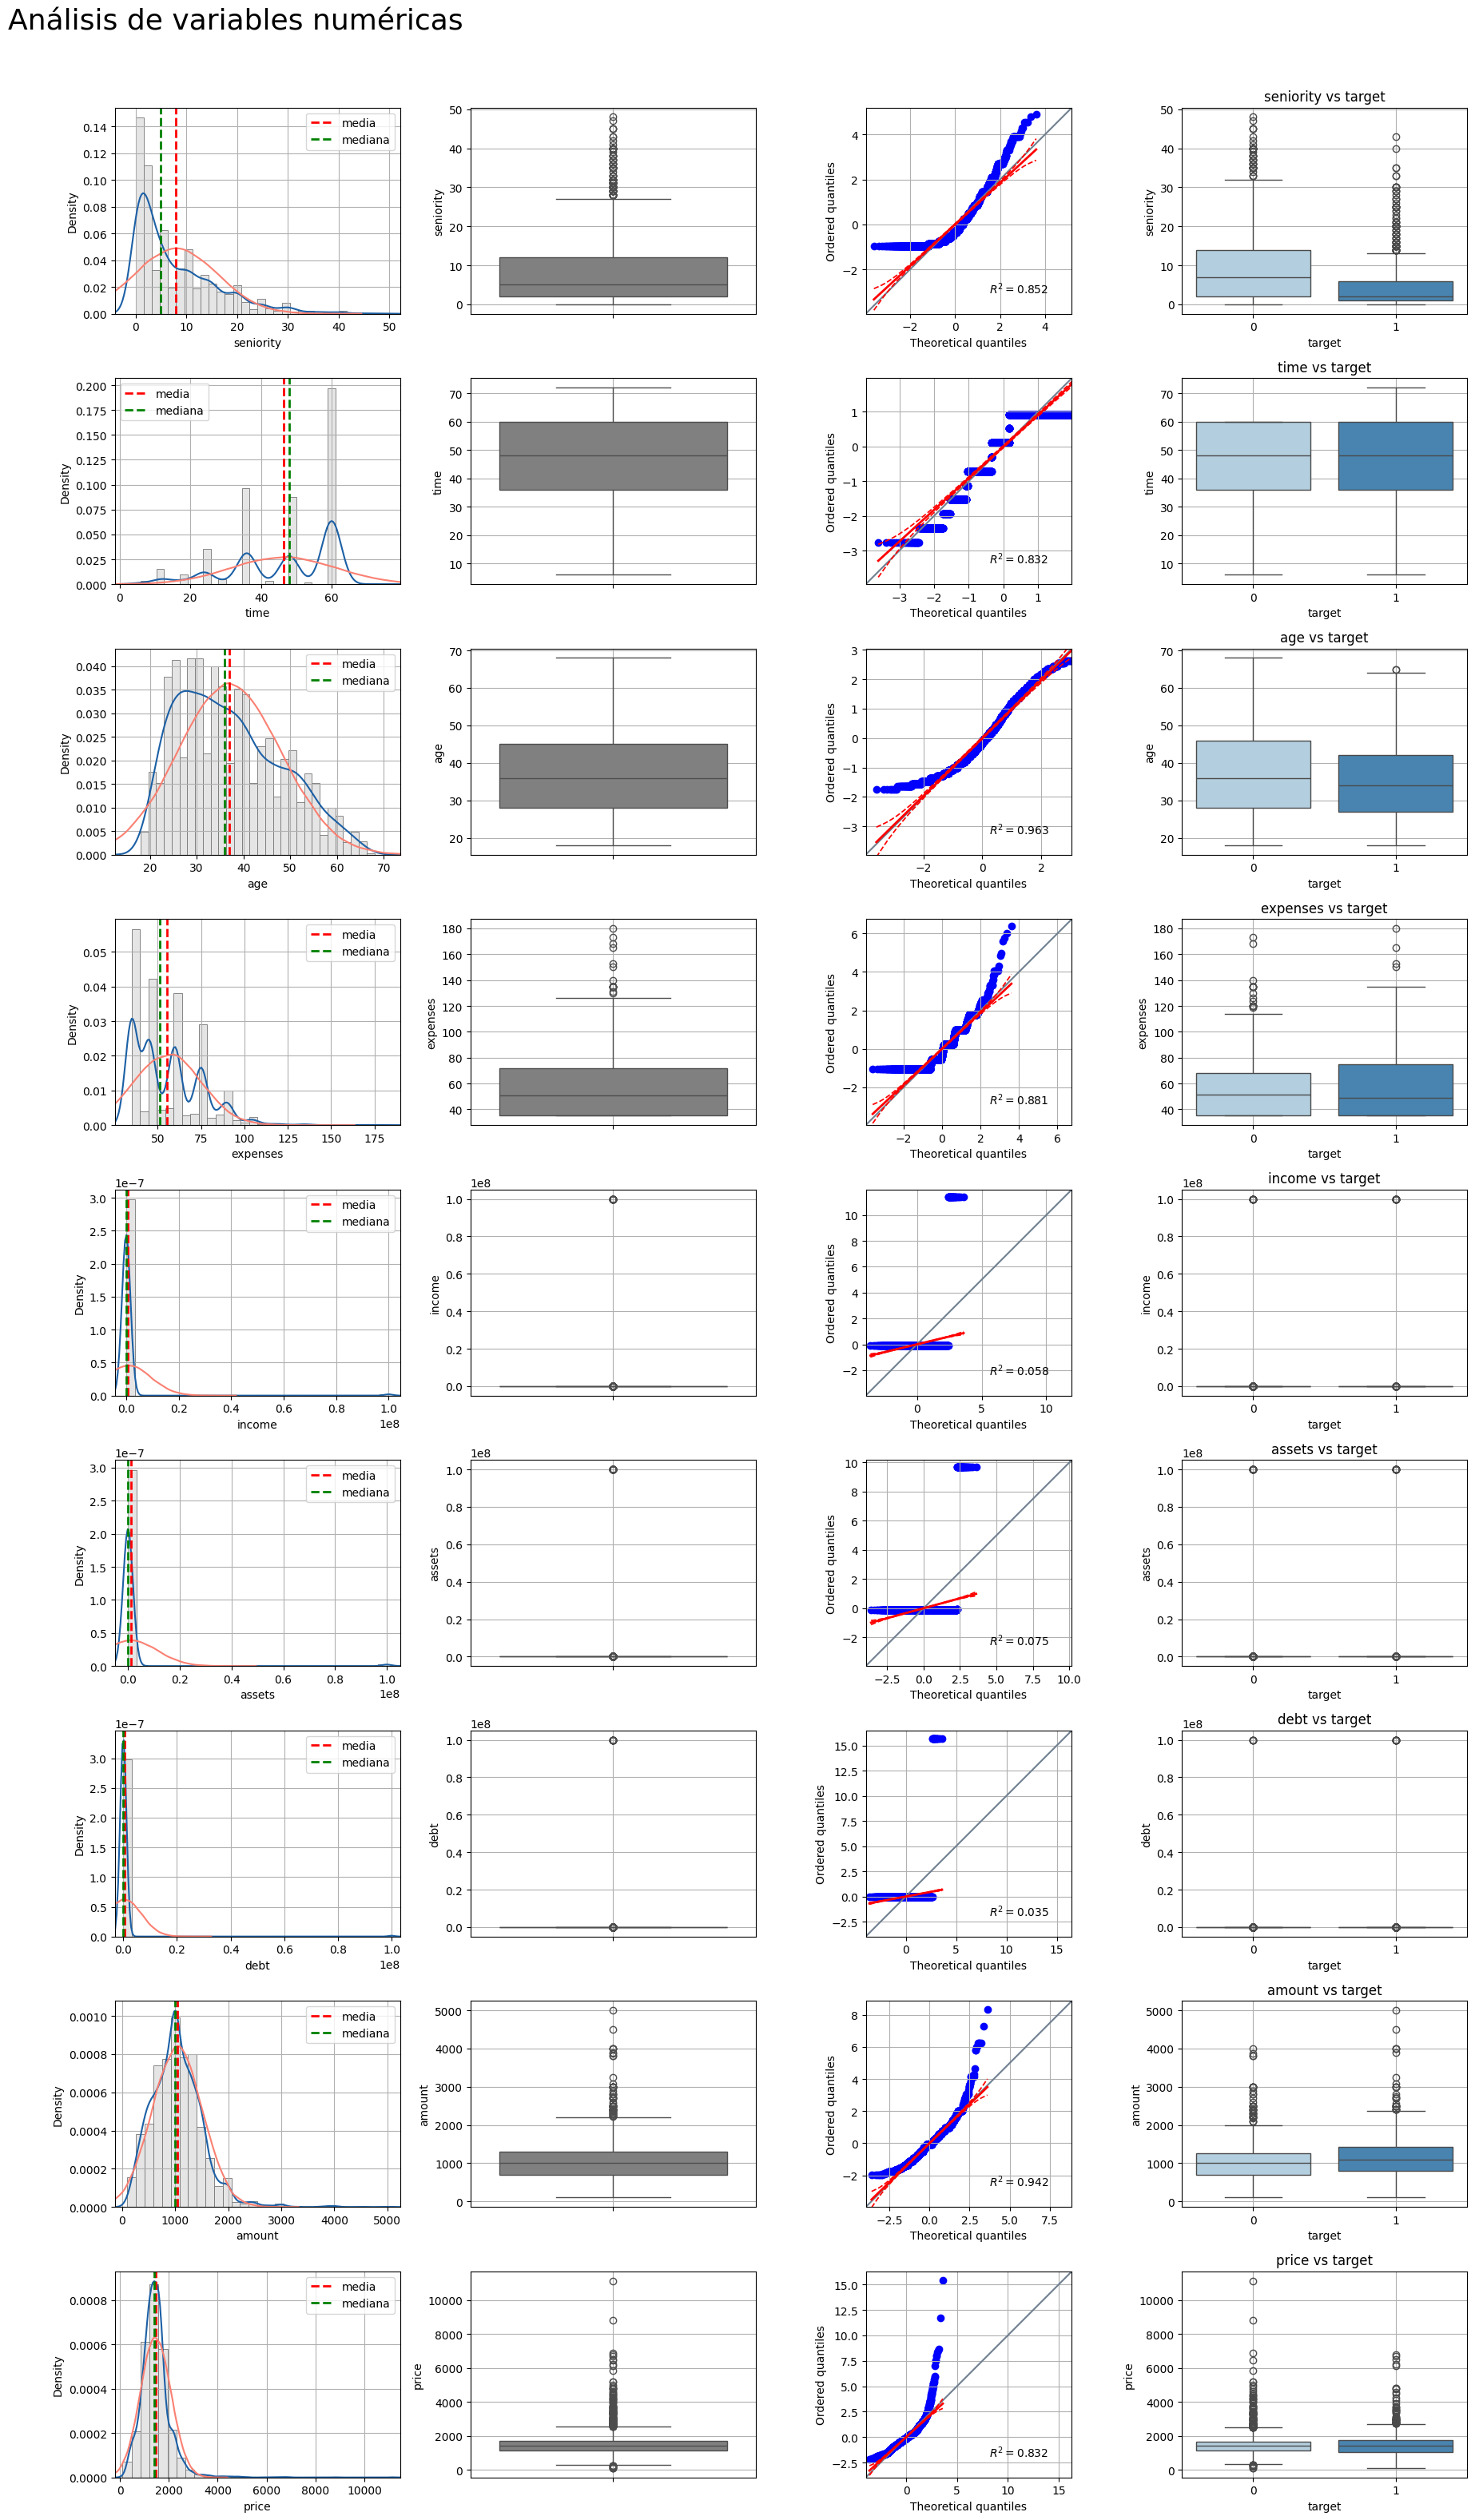

,variable,normal,p_value
0,seniority,No,9.840651e-223
1,time,No,2.167329e-89
2,age,No,2.607368e-69
3,expenses,No,3.000010e-148
4,income,No,0.000000e+00
5,assets,No,0.000000e+00
6,debt,No,0.000000e+00
7,amount,No,4.782498e-242
8,price,No,0.000000e+00


In [50]:
from src.analysis import EDA
EDA.analisis_variables_numericas(data, 'target')

In [51]:
data

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price,target
0,ok,9,rent,60,30,married,no,freelance,73,129,0,0,800,846,0
1,ok,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658,0
2,default,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985,1
3,ok,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325,0
4,ok,0,rent,36,26,single,no,fixed,46,107,0,0,310,910,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4450,default,1,rent,60,39,married,no,fixed,69,92,0,0,900,1020,1
4451,ok,22,owner,60,46,married,no,fixed,60,75,3000,600,950,1263,0
4452,default,0,owner,24,37,married,no,partime,60,90,3500,0,500,963,1
4453,ok,0,rent,48,23,single,no,freelance,49,140,0,0,550,550,0


La variable 'marital' es categórica con 6 categorías. Procediendo sin agrupación.


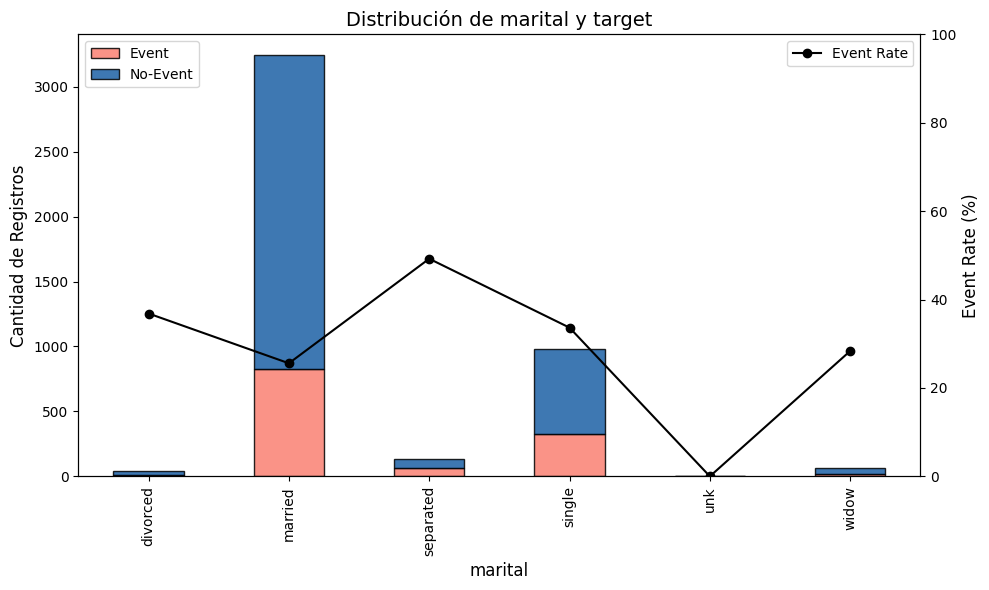


Chi-cuadrado: 55.5209
P-valor: 1.0199e-10
Conclusión: La relación entre marital y target es Significativa (p < 0.05).



target,No-Event,Event,proportion_event,proportion_no_event,WOE,event_rate (%),total_records
marital,,,,,,,
divorced,24,14,1.115538e-02,0.007500,0.397019,36.842105,38
married,2412,829,6.605578e-01,0.753750,-0.131976,25.578525,3241
separated,66,64,5.099602e-02,0.020625,0.905244,49.230769,130
single,649,329,2.621514e-01,0.202813,0.256640,33.640082,978
unk,1,0,1.000000e-10,0.000313,-14.954945,0.000000,1
widow,48,19,1.513944e-02,0.015000,0.009253,28.358209,67


In [54]:
from src.analysis import EDA
EDA.plot_stacked_bar_with_event_rate(data, 'marital', 'target')